# Machine Learning Project - CreditCard Fraud Detection

## Importing all the required packages

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import itertools
from collections import Counter
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model
import pydot
import pylab as pl
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## Reading the Dataset into pandas dataframe

In [2]:
df = pd.read_csv('/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# checking for Null Values
df.isnull().sum().max()

0

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# The Dataset is highly imbanlced
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions  (0: No Fraud || 1: Fraud)')

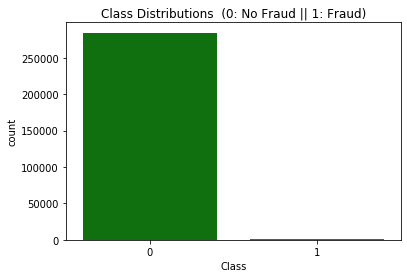

In [7]:
colors = ["Green", "Red"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions  (0: No Fraud || 1: Fraud)')

In [8]:
##Average Amount of Non-Fraud Transactions
##Average Amount of Fraud Transactions

print(df[df['Class']==0].groupby('Class')[list(df)[-2:-1]].mean())
print(df[df['Class']==1].groupby('Class')[list(df)[-2:-1]].mean())

          Amount
Class           
0      88.291022
           Amount
Class            
1      122.211321


In [9]:
##Getting max transaction amount for non fraud transactions
##Getting max transaction amount for fraud transactions

print(df[df['Class']==0].groupby('Class')[list(df)[-2:-1]].max())
print(df[df['Class']==1].groupby('Class')[list(df)[-2:-1]].max())

         Amount
Class          
0      25691.16
        Amount
Class         
1      2125.87


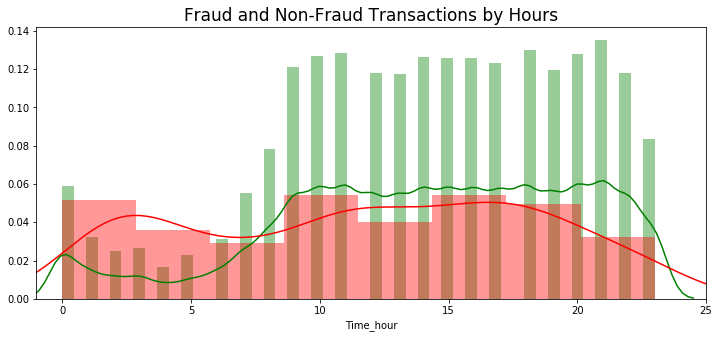

In [10]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

plt.figure(figsize=(12,5))
sns.distplot(df[df['Class'] == 0]["Time_hour"], 
             color='g')
sns.distplot(df[df['Class'] == 1]["Time_hour"], 
             color='r')
plt.title('Fraud and Non-Fraud Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()



Text(0, 0.5, 'Non-Fraud Transactions')

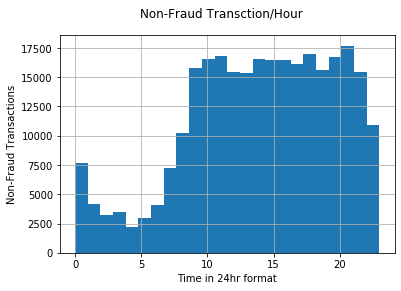

In [11]:
##Plotting Non-Fraud Transaction per hour graph

df2=df[df['Class']==0].groupby('Class')
df2['Time_hour'].hist(bins=24)
pl.suptitle("Non-Fraud Transction/Hour")
pl.xlabel("Time in 24hr format")
pl.ylabel("Non-Fraud Transactions")
#pl.xlim([-1,25])

Text(0, 0.5, 'Fradulent Transactions')

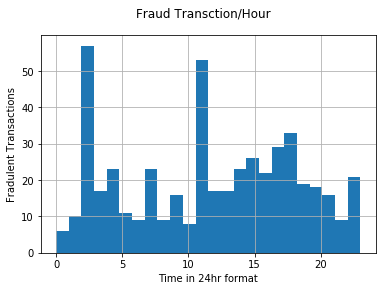

In [12]:
## Plotting Fraud transaction per hour graph

df1=df[df['Class']==1].groupby('Class')
df1['Time_hour'].hist(bins=24)
pl.suptitle("Fraud Transction/Hour")
pl.xlabel("Time in 24hr format")
pl.ylabel("Fradulent Transactions")

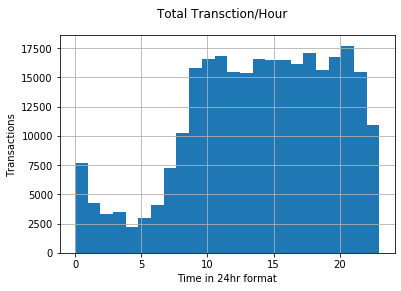

In [13]:
## Plotting All Transactions per hour graph

df3=df
df3['Time_hour'].hist(bins=24)
pl.suptitle("Total Transction/Hour")
pl.xlabel("Time in 24hr format")
pl.ylabel("Transactions")

df = df.drop("Time_hour", axis = 1)

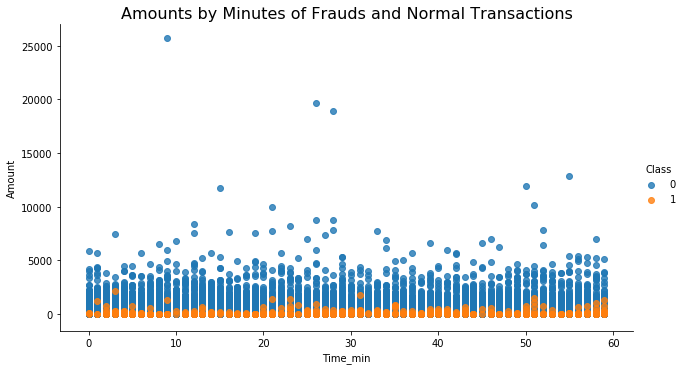

In [14]:
## Amount by Minutes of All Transaction

ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=df, hue='Class')

plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
plt.show()

df = df.drop("Time_min", axis = 1)

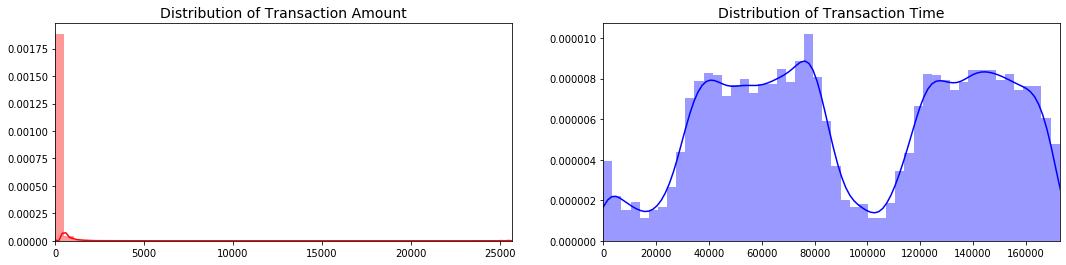

In [15]:
## Plotting Amount and Time before scaling

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [16]:
## Using Robust Scaler for scaling for time and amount

robust_scaler = RobustScaler()

df['scaled_amount'] = robust_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = robust_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [17]:
## Splitting columns such that we have Target (Class) and all the columns

y = df['Class']
X = df.drop(['Class'], axis = 1)

## Spliting data into 80-20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [18]:
### Regular DNN Model
## Creating a Keras Sequential model 

model = Sequential()
model.add(Dense(input_dim = 30, units = 16, activation = 'relu'))
model.add(Dense(units = 24, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 20, activation = 'relu'))
model.add(Dense(units = 24, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,933
Trainable params: 1,933
Non-trainable params: 0
____________________________________________________

In [20]:
## compiling model with adam optimizer, binary_crossentropy and metrics as accuracy 
## and training with batch size 15 and 5 epochs 

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
227845/227845 [==============================] - 20s 87us/step - loss: 0.0076 - accuracy: 0.9990
Epoch 2/5
227845/227845 [==============================] - 19s 86us/step - loss: 0.0041 - accuracy: 0.9993
Epoch 3/5
227845/227845 [==============================] - 20s 86us/step - loss: 0.0039 - accuracy: 0.9993
Epoch 4/5
227845/227845 [==============================] - 20s 87us/step - loss: 0.0036 - accuracy: 0.9993
Epoch 5/5
227845/227845 [==============================] - 20s 87us/step - loss: 0.0037 - accuracy: 0.9994


In [21]:
score = model.evaluate(X_test, y_test)
print(score)

56962/56962 [==============================] - 1s 19us/step
[0.003202113032165042, 0.9993504285812378]


In [22]:
## Predict the model and calculate the FPR, TPR values and aux score

y_pred = model.predict(X_test)
DNN_fpr, DNN_tpr, DNN_thresold = roc_curve(y_test, y_pred)
auc_DNN = auc(DNN_fpr, DNN_tpr)

In [23]:
## Customised method to plot confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    
    plt.savefig("Confusion_Matrix1.png")

[[56847    17]
 [   20    78]]
Confusion matrix, without normalization


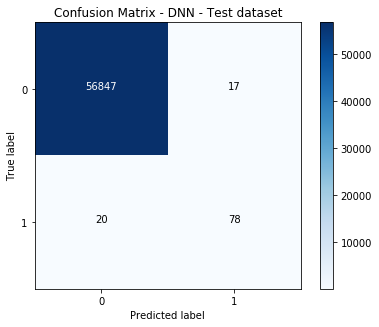

In [24]:
## Generating Confusion matrix and plotting the graph

cm = confusion_matrix(y_test, y_pred.round())
print(cm)
plot_confusion_matrix(cm, classes = [0,1], title='Confusion Matrix - DNN - Test dataset')

In [25]:
## created arrays to store different scores which will be passed to create metrics table

accuracy_scores=[]
precision_scores=[]
recall_scores=[]
f1_scores=[]

accuracy_scores.append(accuracy_score(y_test, y_pred.round()))
precision_scores.append(precision_score(y_test, y_pred.round()))
recall_scores.append(recall_score(y_test, y_pred.round()))
f1_scores.append(f1_score(y_test, y_pred.round()))

print("Acuracy Score of DNN: ",accuracy_score(y_test, y_pred.round()))
print("Precision Score of DNN: ",precision_score(y_test, y_pred.round()))
print("Recall Score of DNN: ",recall_score(y_test, y_pred.round()))
print("f1 Score of DNN: ",f1_score(y_test, y_pred.round()))

Acuracy Score of DNN:  0.9993504441557529
Precision Score of DNN:  0.8210526315789474
Recall Score of DNN:  0.7959183673469388
f1 Score of DNN:  0.8082901554404144


In [26]:
## Undersampling -- DNN Model

## Creating new df with 492 frauds and 492 non-frauds

df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)
print("Length of Undersampling Dataframe",len(new_df))
new_df.head()


Length of Undersampling Dataframe 984


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
100969,1.900370,-0.199838,-1.554211,-1.621440,2.065068,-2.329800,-0.592700,-0.302592,-0.695613,0.319850,...,0.370596,0.180948,0.423200,0.249965,-0.014193,0.415597,-0.161880,0.239305,0.144655,0
154697,-0.201355,0.210682,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,...,-0.227882,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,1
138576,-0.125900,-0.022991,-2.763822,2.688924,-0.607167,-0.112556,-1.191683,-0.279054,-1.162906,1.153834,...,-0.130451,0.652214,-0.828575,0.336771,-0.054617,0.006208,0.112862,0.128939,-0.003116,0
87354,-0.041361,-0.270750,-1.522305,1.505152,0.372364,2.286869,-0.526519,0.998593,-1.087556,-0.027248,...,0.412801,0.332216,0.493981,-0.080198,-0.253327,-0.477800,0.991740,-0.952554,-0.390364,1
18809,0.115978,-0.645062,0.923764,0.344048,-2.880004,1.721680,-3.019565,-0.639736,-3.801325,1.299096,...,0.170872,0.899931,1.481271,0.725266,0.176960,-1.815638,-0.536517,0.489035,-0.049729,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


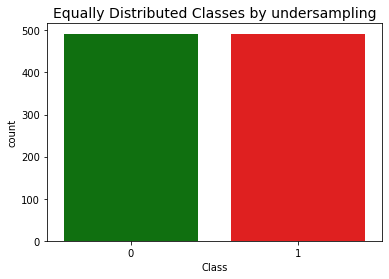

In [27]:
## plotting the graph showing equal number of fraud and non-fraud transaction (492 of both classes) 

print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes by undersampling', fontsize=14)
plt.show()

In [28]:
## Splitting dataset into 80-20 

X_undersample = new_df.iloc[:, new_df.columns != 'Class']
y_undersample = new_df.iloc[:, new_df.columns == 'Class']

X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.2)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [29]:
## Using the same sequential model as before
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,933
Trainable params: 1,933
Non-trainable params: 0
____________________________________________________

In [30]:
## compiling model with adam optimizer, binary_crossentropy and metrics as accuracy 
## and training with batch size 15 and 5 epochs 

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
787/787 [==============================] - 0s 275us/step - loss: 0.3670 - accuracy: 0.9161
Epoch 2/5
787/787 [==============================] - 0s 101us/step - loss: 0.1803 - accuracy: 0.9314
Epoch 3/5
787/787 [==============================] - 0s 102us/step - loss: 0.1549 - accuracy: 0.9377
Epoch 4/5
787/787 [==============================] - 0s 104us/step - loss: 0.1414 - accuracy: 0.9466
Epoch 5/5
787/787 [==============================] - 0s 100us/step - loss: 0.1302 - accuracy: 0.9504


In [31]:
## Predict the model and calculate the FPR, TPR values and aux score

y_pred = model.predict(X_test)
DNN_US_fpr, DNN_US_tpr, DNN_US_thresold = roc_curve(y_test, y_pred)
auc_DNN_US = auc(DNN_US_fpr, DNN_US_tpr)

[[105   2]
 [ 15  75]]
Confusion matrix, without normalization


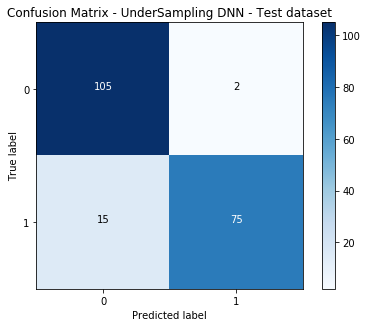

In [32]:
## Calculate and Plotting Confusion Matrix

y_expect = pd.DataFrame(y_test)
cm = confusion_matrix(y_expect, y_pred.round())
print(cm)
plot_confusion_matrix(cm, classes = (0, 1), title = 'Confusion Matrix - UnderSampling DNN - Test dataset')
plt.show()

In [33]:
## claculating different scores and stores in a array

accuracy_scores.append(accuracy_score(y_test, y_pred.round()))
precision_scores.append(precision_score(y_test, y_pred.round()))
recall_scores.append(recall_score(y_test, y_pred.round()))
f1_scores.append(f1_score(y_test, y_pred.round()))

print("Acuracy Score of DNN: ",accuracy_score(y_test, y_pred.round()))
print("Precision Score of DNN: ",precision_score(y_test, y_pred.round()))
print("Recall Score of DNN: ",recall_score(y_test, y_pred.round()))
print("f1 Score of DNN: ",f1_score(y_test, y_pred.round()))

Acuracy Score of DNN:  0.9137055837563451
Precision Score of DNN:  0.974025974025974
Recall Score of DNN:  0.8333333333333334
f1 Score of DNN:  0.8982035928143713


In [34]:
## SMOTE

X_SMOTE, y_SMOTE = SMOTE().fit_sample(X, y)
X_SMOTE.shape

(568630, 30)

In [35]:
## Oversampling data with 284315 of each class

counter = Counter(y_SMOTE)
print(counter)

Counter({0: 284315, 1: 284315})


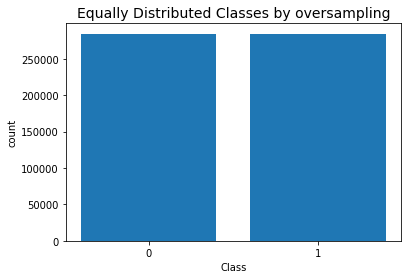

In [36]:
## Plotting the graph to show equal fraud and non-fraud transactions

plt.bar(range(len(counter)), list(counter.values()), align='center')
plt.xticks(range(len(counter)), list(counter.keys()))
plt.title('Equally Distributed Classes by oversampling', fontsize=14)
plt.xlabel("Class")
plt.ylabel("count")
plt.show()


In [37]:
## Spliting data 80-20 and creating validation data

X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size = 0.2)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,933
Trainable params: 1,933
Non-trainable params: 0
____________________________________________________

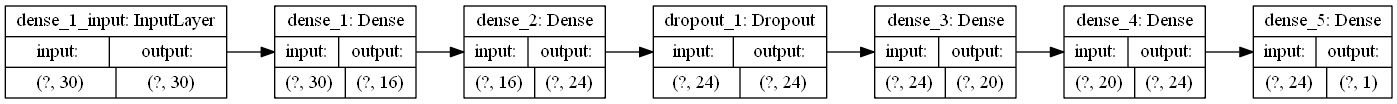

In [39]:
## Plotting the Plot of the Sequential model

tf.keras.utils.plot_model(model, to_file='Model_plot.png', show_shapes=True, show_layer_names=True, rankdir='LR')

In [40]:
## compiling model with adam optimizer, binary_crossentropy and metrics as accuracy 
## and training with batch size 15 and 5 epochs 

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history= model.fit(X_train, y_train, batch_size = 15, epochs = 5,validation_data=(X_val, y_val))

Train on 363923 samples, validate on 90981 samples
Epoch 1/5
363923/363923 [==============================] - 36s 98us/step - loss: 0.0289 - accuracy: 0.9903 - val_loss: 0.0153 - val_accuracy: 0.9959
Epoch 2/5
363923/363923 [==============================] - 36s 99us/step - loss: 0.0129 - accuracy: 0.9966 - val_loss: 0.0126 - val_accuracy: 0.9969
Epoch 3/5
363923/363923 [==============================] - 36s 99us/step - loss: 0.0108 - accuracy: 0.9974 - val_loss: 0.0089 - val_accuracy: 0.9979
Epoch 4/5
363923/363923 [==============================] - 37s 103us/step - loss: 0.0092 - accuracy: 0.9978 - val_loss: 0.0116 - val_accuracy: 0.9966
Epoch 5/5
363923/363923 [==============================] - 38s 104us/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 0.0095 - val_accuracy: 0.9980


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


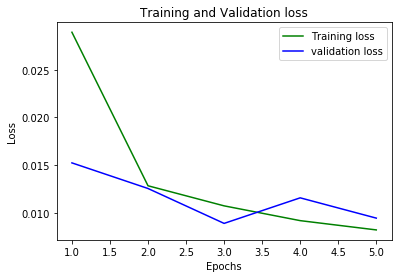

In [41]:
### Plotting Val_loss and train_loss

print(history.history.keys())
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

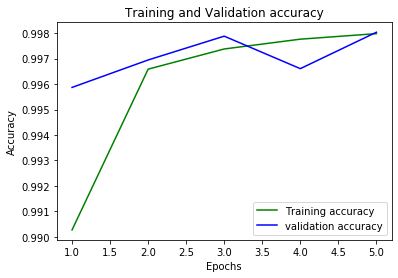

In [42]:
## Plotting accuracy and val_accuracy graphs

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
## Predict the model, Calculate the confusion matrix

y_pred = model.predict(X_test)

DNN_SMOTE_fpr, DNN_SMOTE_tpr, DNN_SMOTE_thresold = roc_curve(y_test, y_pred)
auc_DNN_SMOTE = auc(DNN_SMOTE_fpr, DNN_SMOTE_tpr)

y_expect = pd.DataFrame(y_test)
cm = confusion_matrix(y_expect, y_pred.round())
print(cm)

[[56566   125]
 [   99 56936]]


Confusion matrix, without normalization


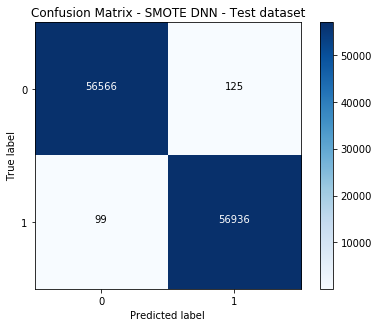

In [44]:
## Plotting the graph for Confusion Matrix

plot_confusion_matrix(cm, classes = (0, 1), title = 'Confusion Matrix - SMOTE DNN - Test dataset')

In [45]:
## calculate the score and store the values

accuracy_scores.append(accuracy_score(y_test, y_pred.round()))
precision_scores.append(precision_score(y_test, y_pred.round()))
recall_scores.append(recall_score(y_test, y_pred.round()))
f1_scores.append(f1_score(y_test, y_pred.round()))

print("Acuracy Score of DNN: ",accuracy_score(y_test, y_pred.round()))
print("Precision Score of DNN: ",precision_score(y_test, y_pred.round()))
print("Recall Score of DNN: ",recall_score(y_test, y_pred.round()))
print("f1 Score of DNN: ",f1_score(y_test, y_pred.round()))

Acuracy Score of DNN:  0.9980303536570353
Precision Score of DNN:  0.9978093619109374
Recall Score of DNN:  0.9982642237222757
f1 Score of DNN:  0.9980367409900435


In [46]:
## Decision Tree
## Splinting data 80-20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)
X_train.shape, X_test.shape

((227845, 30), (56962, 30))

In [47]:
## Creating a decision tree model

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

## calculate TPR,FPR and auc score

DT_fpr, DT_tpr, DT_thresold = roc_curve(y_test, y_pred)
auc_DT = auc(DT_fpr, DT_tpr)

In [48]:
decision_tree_model.score(X_test, y_test)

0.9991397773954567

In [49]:
## Calculate the confusion matrix values

cm = confusion_matrix(y_test, y_pred.round())
print(cm)

[[56834    22]
 [   27    79]]


In [50]:
## calculate values and store the values in array

accuracy_scores.append(accuracy_score(y_test, y_pred.round()))
precision_scores.append(precision_score(y_test, y_pred.round()))
recall_scores.append(recall_score(y_test, y_pred.round()))
f1_scores.append(f1_score(y_test, y_pred.round()))

print("Acuracy Score of DNN: ",accuracy_score(y_test, y_pred.round()))
print("Precision Score of DNN: ",precision_score(y_test, y_pred.round()))
print("Recall Score of DNN: ",recall_score(y_test, y_pred.round()))
print("f1 Score of DNN: ",f1_score(y_test, y_pred.round()))

Acuracy Score of DNN:  0.9991397773954567
Precision Score of DNN:  0.7821782178217822
Recall Score of DNN:  0.7452830188679245
f1 Score of DNN:  0.7632850241545893


Confusion matrix, without normalization


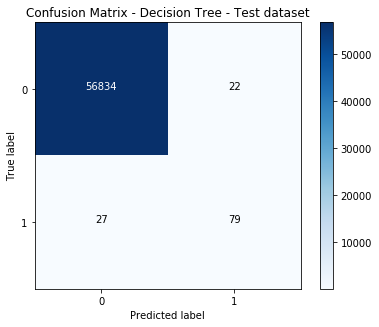

In [51]:
## Plot the Confusion Matrix

plot_confusion_matrix(cm, classes = [0, 1], title = 'Confusion Matrix - Decision Tree - Test dataset')

In [52]:
## Random Forest
## Dividing sample into 80-20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44)
X_train.shape, X_test.shape

((227845, 30), (56962, 30))

In [53]:
## Creating a RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

RF_fpr, RF_tpr, RF_thresold = roc_curve(y_test, y_pred)
auc_RF = auc(RF_fpr, RF_tpr)

In [54]:
rf_model.score(X_test, y_test)

0.9994733330992591

In [55]:
## Calculating a confusion matrix values

cm = confusion_matrix( y_test, y_pred.round())
print(cm)

[[56857     5]
 [   25    75]]


Confusion matrix, without normalization


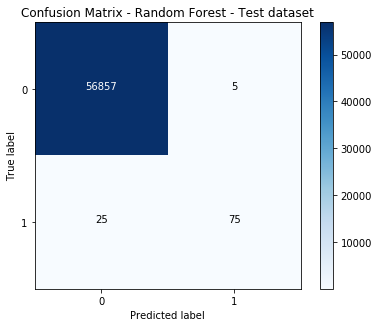

In [56]:
## Plotting the confusion matrix

plot_confusion_matrix(cm, classes = [0, 1], title = 'Confusion Matrix - Random Forest - Test dataset')

In [57]:
## Calculating the scores and storing the values

accuracy_scores.append(accuracy_score(y_test, y_pred.round()))
precision_scores.append(precision_score(y_test, y_pred.round()))
recall_scores.append(recall_score(y_test, y_pred.round()))
f1_scores.append(f1_score(y_test, y_pred.round()))

print("Acuracy Score of DNN: ",accuracy_score(y_test, y_pred.round()))
print("Precision Score of DNN: ",precision_score(y_test, y_pred.round()))
print("Recall Score of DNN: ",recall_score(y_test, y_pred.round()))
print("f1 Score of DNN: ",f1_score(y_test, y_pred.round()))

Acuracy Score of DNN:  0.9994733330992591
Precision Score of DNN:  0.9375
Recall Score of DNN:  0.75
f1 Score of DNN:  0.8333333333333334


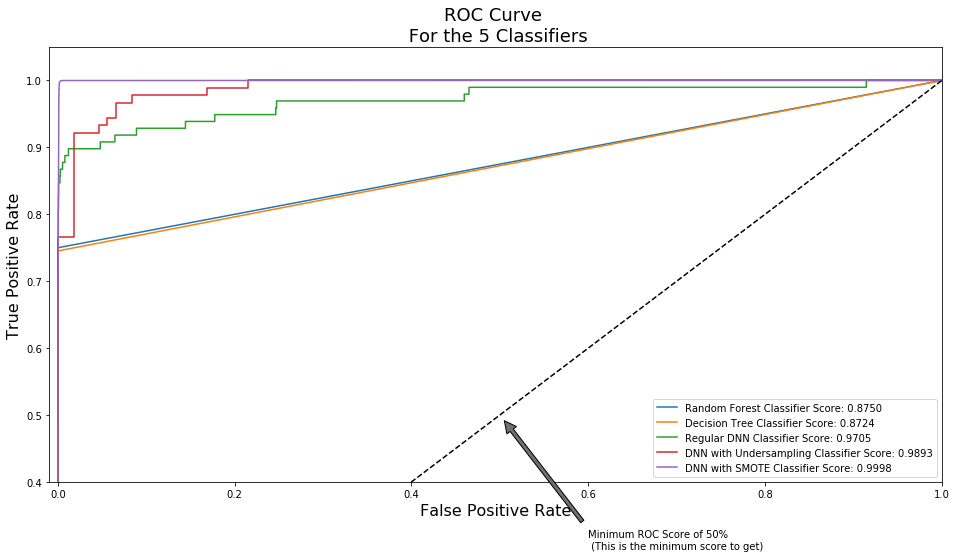

In [58]:
## Customised method for plotting the ROC Curve

def graph_roc_curve_multiple(RF_fpr, RF_tpr, auc_RF, 
                             DT_fpr, DT_tpr, auc_DT, 
                             DNN_fpr, DNN_tpr, auc_DNN, 
                             DNN_SMOTE_fpr, DNN_SMOTE_tpr, auc_DNN_SMOTE, 
                             DNN_US_fpr, DNN_US_tpr, auc_DNN_US):
    
    plt.figure(figsize=(16,8))
    plt.xlim(0, 0.2)
    plt.ylim(0.8, 1)
    plt.title('ROC Curve \n For the 5 Classifiers', fontsize=18)
    plt.plot(RF_fpr, RF_tpr, label='Random Forest Classifier Score: {:.4f}'.format(auc_RF))
    plt.plot(DT_fpr, DT_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(auc_DT))
    plt.plot(DNN_fpr, DNN_tpr, label='Regular DNN Classifier Score: {:.4f}'.format(auc_DNN))
    plt.plot(DNN_US_fpr, DNN_US_tpr, label='DNN with Undersampling Classifier Score: {:.4f}'.format(auc_DNN_US))
    plt.plot(DNN_SMOTE_fpr, DNN_SMOTE_tpr, label='DNN with SMOTE Classifier Score: {:.4f}'.format(auc_DNN_SMOTE))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0.4, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(RF_fpr, RF_tpr, auc_RF, DT_fpr, DT_tpr, auc_DT, DNN_fpr, DNN_tpr, auc_DNN, DNN_SMOTE_fpr, DNN_SMOTE_tpr, auc_DNN_SMOTE, DNN_US_fpr, DNN_US_tpr, auc_DNN_US)

plt.show()

In [59]:
## Passing values to generate Metrics Table

estimator = ['Regular DNN','DNN with UnderSampling','DNN with SMOTE','Decision Tree','Random Forest']
d = {'Estimator': estimator,
     'Accuracy':accuracy_scores,
     'Precision_Score':precision_scores,
     'Recall_Score':recall_scores,
     'F1_score': f1_scores
    }

table = pd.DataFrame(data=d).set_index('Estimator')
table

,Accuracy,Precision_Score,Recall_Score,F1_score
Estimator,,,,
Regular DNN,0.999350,0.821053,0.795918,0.808290
DNN with UnderSampling,0.913706,0.974026,0.833333,0.898204
DNN with SMOTE,0.998030,0.997809,0.998264,0.998037
Decision Tree,0.999140,0.782178,0.745283,0.763285
Random Forest,0.999473,0.937500,0.750000,0.833333
